Cap Recognizer

In [ ]:
#|default_exp app

In [ ]:
!pip install -Uqq fastai gradio nbdev

In [2]:
from fastai.vision.all import *

In [3]:
#|export
from fastai.vision.all import load_learner
import gradio as gr

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/cap_recognizer/Cap Recognizer

/content/drive/MyDrive/cap_recognizer/Cap Recognizer


In [7]:
#|export
model = load_learner('models/cap-recognizer-v2.pkl')

In [8]:
#|export
cap_labels = ('balaclava cap',
              'baseball cap',
              'beanie cap',
              'boater hat',
              'bowler hat',
              'bucket hat',
              'cowboy hat',
              'fedora cap',
              'flat cap',
              'ivy cap',
              'kepi cap',
              'newsboy cap',
              'pork pie hat',
              'rasta cap',
              'sun hat',
              'taqiyah cap',
              'top hat',
              'trucker cap',
              'turban cap',
              'visor cap')
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred, probs)
  return dict(zip(cap_labels, map(float, probs)))


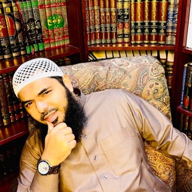

In [9]:
img = PILImage.create(f'test_images/unknown_02.jpg')
img.thumbnail((192,192))
img

In [10]:
recognize_image(img)

taqiyah cap tensor([9.0921e-05, 4.3734e-05, 2.5545e-02, 9.5070e-05, 4.8137e-04, 1.1207e-04,
        3.1543e-04, 1.7799e-05, 3.7111e-04, 2.5229e-03, 2.7433e-03, 1.7648e-03,
        6.7687e-04, 1.9641e-03, 2.4643e-04, 8.8891e-01, 6.5454e-04, 1.8951e-04,
        6.9819e-02, 3.4340e-03])


{'balaclava cap': 9.092070104088634e-05,
 'baseball cap': 4.37337439507246e-05,
 'beanie cap': 0.025544853881001472,
 'boater hat': 9.50695903156884e-05,
 'bowler hat': 0.00048137499834410846,
 'bucket hat': 0.00011207450006622821,
 'cowboy hat': 0.00031543479417450726,
 'fedora cap': 1.779926060407888e-05,
 'flat cap': 0.00037111053825356066,
 'ivy cap': 0.0025228995364159346,
 'kepi cap': 0.0027432788629084826,
 'newsboy cap': 0.0017647615168243647,
 'pork pie hat': 0.0006768710445612669,
 'rasta cap': 0.0019640671089291573,
 'sun hat': 0.0002464253338985145,
 'taqiyah cap': 0.8889122605323792,
 'top hat': 0.0006545442156493664,
 'trucker cap': 0.0001895064051495865,
 'turban cap': 0.06981894373893738,
 'visor cap': 0.0034340466372668743}

In [11]:
#!export
image = gr.Image(width=192, height=192)
label = gr.Label()
examples = [
    'test_images/unknown_00.jpg',
    'test_images/unknown_01.jpg',
    'test_images/unknown_02.jpg',
    'test_images/unknown_03.jpg']


iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples = examples)
iface.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1ff4864e4dc6a177d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Notebook to Python Script Export


In [12]:
from nbdev.export import notebook2script
notebook2script('app.ipynb')

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (/usr/local/lib/python3.11/dist-packages/nbdev/export.py)